In [1]:
from IPython.display import display, Markdown, HTML, IFrame
display(HTML("<style>.container { width:80% !important; }</style>"))

# coronasaurus
This repository is coronasaurus's entry to NERC's [COVID-19 Hackathon 2: Recovery](https://digitalenvironment.org/home/covid-19-digital-sprint-hackathons/covid-19-hackathon-2-recovery/).

In [2]:
from presentation.utils import server_probe
server_probe()

from bokeh.plotting import output_notebook
output_notebook()

You're currently viewing this notebook locally. You could also run it online in an interactive binder by clicking below:\
            [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/master?urlpath=%2Flab%2Fcoronasaurus.ipynb)

Loading BokehJS ...

## Introduction
The unprecedented global response to the COVID-19 pandemic has resulted in huge population behavioural changes; from the cessation of travel to a transition to remote working. We don't often see changes of this magnitude, which offers researchers the unique opportunity to evaluate the impact of lockdown measures.

One particular area of interest is the impact on greenhouse gas emissions. As a signatory of the Paris Agreement the UK has a responsibility to limit the global average temperature rise to below 2&deg;C, but this is an ambitious task! Can we use data from this event to evaluate the sort of changes that might need to be made to meet these climate goals?

### Targets
First off, let's have a look at the targets that the UK are trying to meet. First of all we've got the Paris Agreement. The signatories of the Paris Agreement agree to:
- Keep global temperature rise to *well below* 2&deg;C [<sup>[1]</sup>](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement).

In order to meet this the EU and its member states agree a Nationally Determined Contribution to:
- Reduce the EU's CO<sub>2</sub>e emissions to 40% below 1990 levels by 2030 [<sup>[2]</sup>](https://www4.unfccc.int/sites/ndcstaging/PublishedDocuments/United%20Kingdom%20of%20Great%20Britain%20and%20Northern%20Ireland%20First/LV-03-06-EU%20INDC.pdf).

The UK has also set it's own targets in the form of "budgets" that it can emit in a given period [<sup>[3]</sup>](https://web.archive.org/web/20200430013424/https://www.theccc.org.uk/what-is-climate-change/reducing-carbon-emissions/carbon-budgets-and-targets/), and finally, in June 2019 the act was amended to add a net zero target by 2020 [<sup>[5]</sup>](https://www.legislation.gov.uk/uksi/2019/1056/contents/made). 

The easiest way to present these targets is to visualise them, along with our current progress to meet them:

In [3]:
# Load emissions data
# output for slides 
from presentation.utils import EmissionsData
emissions = EmissionsData('presentation/emissions.csv'); emissions.plot()

### Assessing the Potential
To best tackle the challenge of reducing our greenhouse gas emissions we need to identify where we're emitting them and how much potential we have at reduction in those regions. The following figure, adapted from [<sup>[6]<sup>](https://data.gov.uk/dataset/9568363e-57e5-4c33-9e00-31dc528fcc5a/final-uk-greenhouse-gas-emissions-national-statistics) illustrate which sectors are responsible for the greatest proportion of emissions:

<img src="presentation/ghg_sector_targets.png" alt="Bar graph" style="width: 700px;"/>
    
As business emissions mainly consist of "Industrial combustion and electricity", and recent data from this sector is difficult to come by, we chose to focus mainly on Transportation, Energy Supply, and Residential sources.
    
#### What's been disrupted?
    
Another factor in assessing the behavioural changes that may have an impact on greenhouse gas emissions is to identify what the major behavioural changes are. We've done this using an interative timeline that you can inspect to identify major events:

In [4]:
# Get the timeline.
display(IFrame('https://cdn.knightlab.com/libs/timeline3/latest/embed/index.html?source=1SNikyZJIHRTfYaJb7OQI7fqJArvOJmL_6TV-jcwl7Z0&font=Default&lang=en&initial_zoom=2&height=350', '80%', 350))

## Assessing CO₂ emissions during lockdown
A range of data sources were considered to investigate the relationship between the COVID-19 lockdown in the UK and $CO_2$ emissions, to include satellite data and in situ observations. However, due to masking of the anthropogenic signal because of natural climate variability, near-real time observations of CO2 emissions are often source of uncertainty [Quere et al., 2020](https://www.nature.com/articles/s41558-020-0797-x). The figures below have been reproduced from the [supplementary data](https://www.icos-cp.eu/gcp-covid19) provided with the publication.

As it can be observed in the figure below, in the UK, daily $CO_2$ emissions have consistently dropped since February 2020. Emissions are estimated to have dropped by up to ~31% between the end of March and early May 2020, when a large proportion of the population had been put on furlough or was working from home.

In [5]:
from Emissions import emissionsdata
e = emissionsdata.Emissions()
e.plot_uk_daily()

Similarly to changes reported for the UK, estimates of global daily $CO_2$ emissions have also shown a decrease between February and May 2020, with levels comparable to those in 2006. Globally, a 17% drop in $CO_2$ emissions was observed in the month of April 2020.

In [20]:
e.plot_global_daily()

Distinguishing the reduction in $CO_2$ emissions by producing sector allows to identify the sectors that experienced the greatest percentage change in 2020, when a number of countries experienced some degree of confinement because of the COVID-19 pandemic. It can be observed that globally the transport sector experienced the largest decrease in $CO_2$ emissions, peaking at the start of April.

In [23]:
e.plot_sector()

## Impact of lockdown on surface traffic

### Data Sources
We developed a class Traffic, which imports the data, presents it in a graphical form and performed regression allowing to better understand impact of different phases of lockdown on change in traffic and CO2 emissions. We investigated the change in different modes of transport during lockdown available at https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic. The dataset include the relative change in traffic volume based on around 275 automatic traffic count sites across Great Britain. The raw data are displayed with plot_transport_data() method.

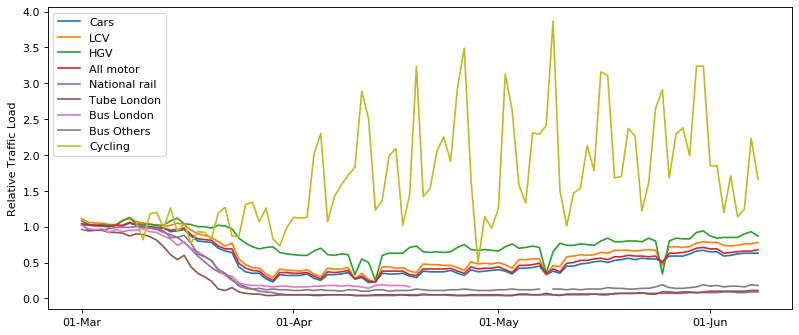

In [7]:
from transport.Transport import Traffic

traffic = Traffic(transport_file='transport/UK_transport.csv', weather_file='transport/UK_weather.csv')
traffic.plot_transport_data(figsize=(12,5))

### CO2 emissions
The drop in traffic volume decreased the emission of CO2. The average emission for different modes of transport in 2019 are available at https://www.gov.uk/government/statistical-data-sets/energy-and-environment-data-tables-env. We used this data set to estimate the CO2 emissions during the lockdown, by assuming that the emissions are proportional to traffic volume. Method plot_CO2_emissions() presents the results.

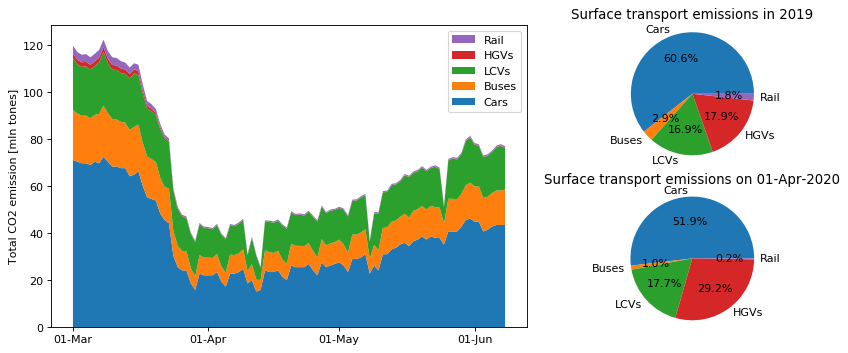

In [8]:
traffic.plot_CO2_emissions(figsize=(12, 5))

Clearlt the lockdown allowed to reduce CO2 emission almost threefold. As the traffic transport is responsible to 33% of net domestic emissions from all sources (data from 2019) this drop corresponds to approximately 20% drop in total UK emissions. Although traffic dropped for all forms of motorised transport the drop is mostly caused by the drop in car traffic volume. The mass transport (buses and rail) experienced the highest drop, but it does not contribute significantly to net CO2 emissions. As the lockdown proceeded and was easened the pollution started to gradually increase. To better understand these changes we quantify this process using interrupted linear model for describing change in traffic volume.

### Interrupted linear model
Interrupted linear model fits a linear model to a given time series, which may experience sudden drops and changes of gradient cause by point events. The events that we analysed include:
1) call for self-quarantine of people with fever or new cough (representing the beginning of COVID-19 restrictions),
2) national-wide partial lockdown,
3) ...

The interrupted model has form:

\begin{align}
y(t) = a_0 + b_0 t + \sum_{i=1}^N a_i x_i + \sum_{i=1}^N b_i x_i t + \epsilon(t),
\end{align}

where $y(t)$ is relative traffic volume on day $t$, $a_i$ and $b_i$ are model parameters, $\epsilon(t)$ is an error term. $x_i$ is a binary variable representing whether given event has already happened, i.e.:

\begin{align}
x_i = \begin{cases} 
x_i = 0 &\mbox{if } t < t_i \\
1 & \mbox{if } t \geq t_i \end{cases}.
\end{align}

Parameters $a_i$ represent the immediate effect of given event on the traffic, while $b_i$ represent the daily effect of given event on traffic volume. The parameters are fitted to the data using ordinary least square (OLS) model using run_interrupted_LM method.

The results are presented in two ways. Firstly, the fitted model is compared with the raw data, allowing to visually observe the immidiate and dialy effects of each regulation. Secondy, the confidence intervals for each immidiate and daily effect are presented using errorbars. They allow to determine whether the fitted effect is significant. The class also produces a diagnostics graphs for each mode of transport, which are saved by default in Transport/Model_diagnostics directory. Their inspection confirms the quality of our model for all modes of transport except bikes, for which separate model is constructed later.

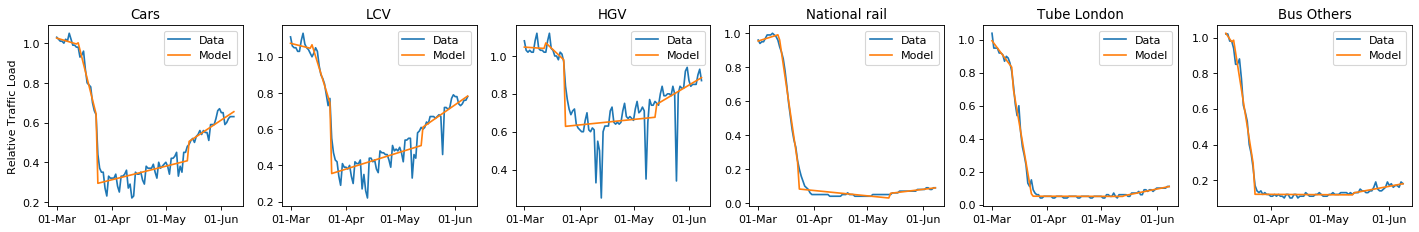

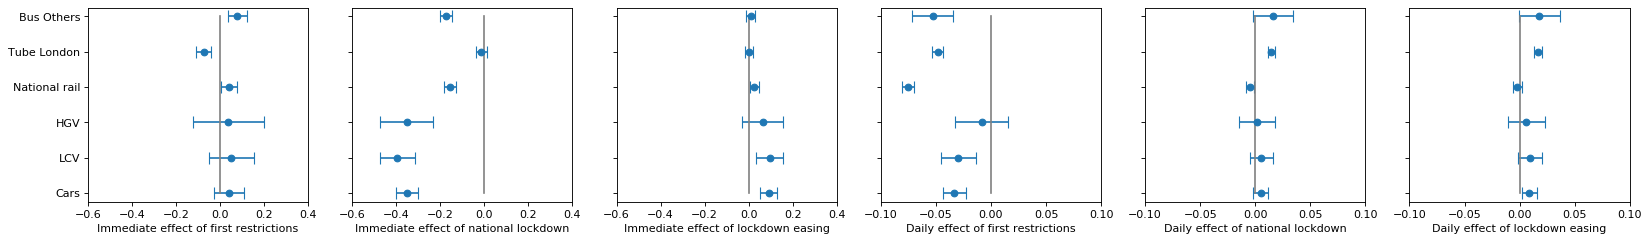

In [9]:
vehicle_types = ['Cars', 'LCV', 'HGV', 'National_rail', 'Tube_London', 'Bus_Others']
traffic.run_interrupted_LM(vehicle_types, figsize=(20,3))

The first conclusion from the graphs is that initial lockdown restrictions caused mostly graduate effect reducing the traffic by similar amount each day. These period affected mostly mass transport, initially increasing the bus and rail traffic (as people started to go back home before lockdown) but then decreasing its volume each day significantly. The largest drop in surface transport happened after announcing national-wide lockdown. The lockdown reduce the car, LCV and HGV traffic by approximately 40% of average traffic volume. After during lockdown these modes of transport started to slowly return to normal, while mass transport stayed at very low levels. The easying of restrictions slightly increase the daily increment in traffic volume.

The only mode of transport which experienced an increment in its traffic are bikes, however the above interrupted linear model did not successfully predict its variation. To improve predictions we apply two modifications of the original model. Firstly, we include a maximum temperature on given day (relative an to average temperature on given month) as an additional linear term. Secondly, we introduced random linear effects correspoding to different week days, as we observed high correlation of bike traffic during the weekends. The model is performed using run_mixed_LM_for_bikes method.

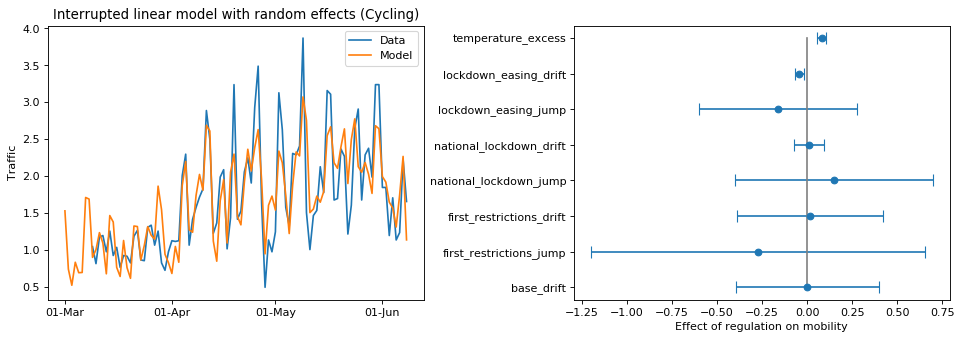

In [10]:
traffic.run_mixed_LM_for_bikes(figsize=(12, 4))

This model much better explains the variation of bike traffic. Suprisingly introducing the temperature cause it to be dominating factor explaining the variation in data. Although we observe higher number of cyclists during the lockdown, the effect of each phase separately is not significant within 95% confidence intervals. Only we observe a reduction of bike traffic in the lockdown easing period, but it may be caused by the fact that this was rainy period in UK.

## Energy
The next most significant sector is energy supply; how have lockdown measures changed the balance and timing of energy demand in the UK?

### National Grid
The National Grid Electricity System Operator (ESO) maintains detailed datasets of the [total demand on the electricity grid over time](https://demandforecast.nationalgrid.com/efs_demand_forecast/faces/DataExplorer). These demand figures detail the total demand over the whole grid, which will include some business use. You can see how we processed that data [here](grid/Grid%20Demand.ipynb).

In [11]:
from grid import griddata_bkh
grid_data = griddata_bkh.GridData('./grid/combined.csv')
grid_data.plot_demand_bkh(figsize=(750,300),collapse=False, color='cadetblue')

Here we can see the available demand data. There is a small gap in the data during the initial lockdown period, and it looks like the resulting demand might be lower than previous years. To assess this properly we trained a Gaussian Process Regression model on the pre-lockdown data points and used it to predict what grid demand could be expected in the future. This is a fancy non-parametric, supervised learning algorithm, and you can play with this model, and try training it yourself [here](grid/Grid%20Demand.ipynb).

In [12]:
grid_data.load_model_output('./grid/model_output.p')
grid_data.plot_model_bkh(figsize=(750,300))

It is clear that the post-lockdown demand is lower than our model expects; with none of the points above the mean and some outside of our lowest confidence intervals. This is more obvious when we plot the demand discrepancy (the measured demand over the forecasted demand).

In [13]:
grid_data.plot_demand_discrepancy_bkh(figsize=(750,300))

### Octopus energy
The utility company, Octopus, have been doing their own data-analysis on energy demand data from their smart meters, and kindly made their results available [on their website](https://tech.octopus.energy/data-discourse/2020-social-distancing/index.html). This is particularly interesting as it allows us to explore Residential Energy use.

We pulled the raw data from the graphs that they provided so that we could perform our own analysis on it. If you're playing along at home then you can see how we did that [here](grid/octopus/octopus-plotly-extraction.ipynb).

In [14]:
from grid import octopusdata
octopus = octopusdata.OctopusData(data_file='./grid/octopus/octopus.csv', weather_file='./grid/octopus/UK_weather.csv')
octopus.plot_timeline_bkh(figsize=(750,300))

The plot above shows what we managed to get; 6 weeks of half-hourly electricity and gas (seasonally corrected) usage averaged over 115,000 smart meters - with one missing week.

In [15]:
octopus.plot_daily_electricity_bkh(figsize=(750,300), plot_temperature=True)

Whilst electricity demand is well above the long term UK mean throughout lockdown, there is a downward trend, suggesting that population behaviour adjusts over pronounced periods of working from home in a way that reduces overall electricity demand. However, we need to make sure that this decrease can't be explained by any other variables, which is why we've included the mean UK temperature for that period. There does seem to be a strong relationship between temperature and demand.

In [16]:
octopus.plot_daily_gas_bkh(figsize=(750,300), plot_temperature=True)

This relationship is even more pronounced for gas usage, which isn't too surprising because of the prevelance of gas boilers for UK central heating systems.

## Societal Consequences
Economically the stay at home measures have forced the closure of many shops and services, which has had a huge impact on the UK economy. In the long term, however, a return to work with a strong push for home-working need not have significant economic downsides. In fact many companies are already moving to a home-working model, at least part time, as it is more economically sustainable.

As such the most important considerations are the social consequences of home working. The Greater London Authority conducted weekly surveys from 20 April 2020 onwards to assess the social impacts of Covid 19 including how the population was coping. Part of this effort was achieved by surveying civil society organisations (charities, local authorities, NGOs, organisation, help groups, etc) and asking them how many people had contacted them for help which they had then either provided or assisted with (the important criteria was that action was actually taken over the problem which eliminated enquiries then may have not actually needed external assistance to solve).

The figures quoted are expressed as a percentage of people helped greater than during normal times. These figures therefore represent the direct social effects of Covid 19 and the Lockdown.

In [17]:
from society import societydata
society = societydata.Society()
society.plot_domestic_issues()

## Happiness, contentment and Anxiety
Over two-thirds of adults consistantly have said that they were very or somewhat worried about the effect that coronavirus (COVID-19) is having on their life.

Through the weeks of lockdown, of the four measures of personal well-being, falling anxiety levels have seen the largest change over the period with happiness increasing over time.

Data Source: Office for National Statistics (ONS).  https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/bulletins/coronavirusandthesocialimpactsongreatbritain/12june2020


Notes:
* Question: "Overall, how satisfied are you with your life nowadays?", "Overall, to what extent do you feel that the things you do in your life are worthwhile?", "Overall, how happy did you feel yesterday?", "Overall, how anxious did you feel yesterday?".
* Each of these questions is answered on a scale of 0 to 10, where 0 is “not at all” and 10 is “completely”.

In [18]:
society.plot_happiness()

### Conclusions

With our data analyses we have demonstrated that

* The lockdown has delivered a measureable impact in CO2 emissions, as indicated *directly* by actual CO2 measurements, and *by proxy* through lower motorised transport load and lower electrical grid use.
* Staying at home has not lead to appreciably higher domestic gas or electricity use.
* CO2 emissions and transport load are returning to pre-lockdown levels, since the lockdown was eased.

While we observe a long-term decreasing trend in both grid use and CO2 emissions, it is unlikely that the Paris Agreement goals will be met, unless some wide-reaching political measures are taken, since emissions are now returning to pre-lockdown levels. 

As a possible political measure to accomodate multiple different challenges, we propose to direct some research attention towards the viability of introducing *four-day week*, as well as an option for a *2+2* day week (with two days at the office and two days at home) for office workers and other positions that do not require everyday presence at the workplace. 

<br>
<img src="./presentation/2plus2.png" alt="Bar graph" style="width: 300px;"/>
<br>

Introducing a four day week could have an impact on the following socio-political and environmental challenges:

* The daily traffic load would be reduced, which would in turn reduce CO2 emissions from traffic and increase air quality.
* National grid use could be reduced, as office spaces could be shrunk, in turn reducing  CO2 emissions driven by electricity and gas central heating.
* There would be decreased load on public transportation, which would facilitate easier enforcing of social distancing measures.
* Post-lockdown unemployment would possibly be mitigated, as flexible contracts would entail a more flexible labour market.
* Improved mental health for workers. Two small scale experiments (see below) have shown mental health improvements as a result of introducing a four-day week. While the societal data that we analysed suggest that mental health has generally been worse than normal during the lockdown, we hypothesise that this effect is mainly driven by "Coronavirus Anxiety", rather than working arrangements. 

While there is little data on the practical consequence of introducing a 4-day week, since it admittetly is a major adjustment involving considerable economic risk, 
some prelimiary data from the trust company [Perpetual Guardian in New Zealand](https://money.cnn.com/2018/07/19/news/economy/new-zealand-four-day-work-week-perpetual-guardian) 
and the software company [Microsoft in Japan](https://www.businessinsider.com/microsoft-4-day-work-week-boosts-productivity-2019-11) have shown promising results, with improved productivity, reduced stress and reduced power use.
